In [1]:
import pickle
import json
import os
import numpy as np
import matplotlib.pyplot as plt


In [5]:
# load all nb json files in processed folder
nb_json_folder = 'data/data_Kaggle/processed/'
notebooks = []
for file in os.listdir(nb_json_folder):
    if file.endswith(".json"): 
        with open(os.path.join(nb_json_folder, file), 'r') as f:
            nb_json = json.load(f)
            notebooks.append(nb_json)

# load nb similarities
nb_sim = 'data/data_Kaggle/stats/DistilBERT_nb_similarities.pkl'  
with open(nb_sim, 'rb') as f:
    nb_sim_matrix = pickle.load(f)

nb_sim_matrix = np.array(nb_sim_matrix)
print(nb_sim_matrix.shape)

# load cell similarities
cell_sim = 'data/data_Kaggle/stats/DistilBERT_nb_similarities.pkl'
with open(cell_sim, 'rb') as f:
    
    cell_sim_matrix = pickle.load(f)

# cell_sim_matrix = np.array(cell_sim_matrix)
# print(cell_sim_matrix.shape)


(20, 20)


c:\Anaconda3\envs\ml_course\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


IndexError: index 20 is out of bounds for axis 0 with size 20

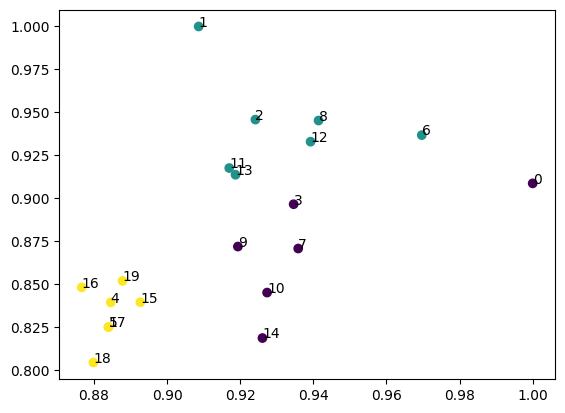

In [6]:
# perform k-means clustering on the similarity matrix
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=42).fit(nb_sim_matrix)

# plot the clusters, plot the nb_idx next to the data point
fig, ax = plt.subplots()
ax.scatter(nb_sim_matrix[:,0], nb_sim_matrix[:,1], c=kmeans.labels_)
for i, txt in enumerate(range(len(notebooks))):
    ax.annotate(txt, (nb_sim_matrix[i,0], nb_sim_matrix[i,1]))
plt.show()

# save the cluster labels
cluster_labels = kmeans.labels_
print(cluster_labels)

for i, nb in enumerate(notebooks):
    print(f"NB {i} is in cluster {cluster_labels[i]}")


In [7]:
import networkx as nx

# create nb sim graph
G_nb = nx.Graph()
edges = []

for i in range(nb_sim_matrix.shape[0]):
    for j in range(nb_sim_matrix.shape[1]):
        nbi = notebooks[i]['nb_name']
        nbj = notebooks[j]['nb_name']
        if nb_sim_matrix[i, j] > 0.9 and nbi != nbj:
            edges.append((nbi, nbj, nb_sim_matrix[i, j]))

G_nb.add_weighted_edges_from(edges)

print(G_nb.number_of_nodes())
print(G_nb.number_of_edges())

# create cell sim graph 
G_cell = nx.Graph()
edges = []

# and create a graph for each classification
edges_per_class = {
    "Environment": [],
    "Data_Extraction": [],
    "Exploratory_Data_Analysis": [],
    "Data_Transform": [],
    "Model_Train": [],
    "Model_Evaluation": [],
    "Model_Interpretation": [],
    "Hyperparameter_Tuning": [],
    "Visualization": [],
    "Debug": [],
    "Data_Export": [],
    "Other": [],
}

for i in range(len(cell_sim_matrix)):
    for j in range(len(cell_sim_matrix[i])):
        nbi = notebooks[i]['nb_name']
        nbj = notebooks[j]['nb_name']
        #cell_sim_matrix[i, j] = np.array(cell_sim_matrix[i][j])
        for c1 in range(len(cell_sim_matrix[i][j])):
            for c2 in range(len(cell_sim_matrix[i][j][c1])):
                class_c1 = notebooks[i]['all_cells'][c1]['classification']
                class_c2 = notebooks[j]['all_cells'][c2]['classification']

                if class_c1 == 'Markdown' or class_c2 == 'Markdown':
                    continue
       
                sim = cell_sim_matrix[i][j][c1][c2]
                if sim > 0.9 and (i != j and c1 != c2):
                    edge_data = {
                        'weight': sim,  # existing weight
                        'nb_idx': (i, j),                         # adding (nb_idx, nb_idx)
                        'mc_idx': (c1, c2)                        # adding (mc_idx, mc_idx)
                    }
                    edges.append((str(i) + '_' + str(c1), str(j) + '_' + str(c2), edge_data))

                    # add to class graph
                    if (class_c1 == 'Other' or class_c2 == 'Other') or class_c1 == class_c2:
                        edges_per_class[class_c1].append((str(i) + '_' + str(c1), str(j) + '_' + str(c2), edge_data))
                        edges_per_class[class_c2].append((str(i) + '_' + str(c1), str(j) + '_' + str(c2), edge_data))



                    # if class_c1 == 'Other' or class_c2 == 'Other':
                    #     for key in edges_per_class.keys():
                    #         edges_per_class[key].append((str(i) + '_' + str(c1), str(j) + '_' + str(c2), edge_data))
                    

G_cell.add_edges_from(edges)

print(G_cell.number_of_nodes())
print(G_cell.number_of_edges())


# make graph per classificaiton
G_env = nx.Graph()
G_de = nx.Graph()
G_eda = nx.Graph()
G_dt = nx.Graph()
G_mt = nx.Graph()
G_me = nx.Graph()
G_mi = nx.Graph()
G_ht = nx.Graph()
G_vis = nx.Graph()
G_dbg = nx.Graph()
G_de = nx.Graph()
G_o = nx.Graph()


G_env.add_edges_from(edges_per_class['Environment'])
G_de.add_edges_from(edges_per_class['Data_Extraction'])
G_eda.add_edges_from(edges_per_class['Exploratory_Data_Analysis'])
G_dt.add_edges_from(edges_per_class['Data_Transform'])
G_mt.add_edges_from(edges_per_class['Model_Train'])
G_me.add_edges_from(edges_per_class['Model_Evaluation'])
G_mi.add_edges_from(edges_per_class['Model_Interpretation'])
G_ht.add_edges_from(edges_per_class['Hyperparameter_Tuning'])
G_vis.add_edges_from(edges_per_class['Visualization'])
G_dbg.add_edges_from(edges_per_class['Debug'])
G_de.add_edges_from(edges_per_class['Data_Export'])
G_o.add_edges_from(edges_per_class['Other'])






19
81


TypeError: object of type 'float' has no len()

In [45]:
# import numpy as np
# import networkx as nx
# from multiprocessing import Pool

# # Assume cell_sim_matrix is a 4D NumPy array
# def process_chunk(nb1i_chunk):
#     edges = []
#     for nb1i in nb1i_chunk:
#         for nb2i in range(nb1i, cell_sim_matrix.shape[1]):  # Avoid redundant checks
#             for c1i in range(cell_sim_matrix.shape[2]):
#                 for c2i in range(cell_sim_matrix.shape[3]):
#                     similarity = cell_sim_matrix[nb1i, nb2i, c1i, c2i]
#                     if similarity > threshold:
#                         node1 = f"{nb1i}_{c1i}"
#                         node2 = f"{nb2i}_{c2i}"
#                         edges.append((node1, node2, similarity))
#         print(f"Processed notebook {nb1i} chunk. Now total {len(edges)} edges.")
#     return edges

# # Parallel processing setup
# threshold = 0.75
# num_processes = 4
# nb1i_chunks = np.array_split(np.arange(cell_sim_matrix.shape[0]), num_processes)

# with Pool(processes=num_processes) as pool:
#     results = pool.map(process_chunk, nb1i_chunks)

# # Flatten the results and construct the graph
# edges = [edge for result in results for edge in result]
# G = nx.Graph()
# G.add_weighted_edges_from(edges)

# # Calculate edge ratio
# total_possible_edges = np.prod(cell_sim_matrix.shape)
# count_edges = len(edges)
# count_non_edges = total_possible_edges - count_edges
# print('Edge ratio: ', count_edges / (count_edges + count_non_edges))

# 567m = 9,5 hours and no result
# 2669m = 44,5 hours and no result

In [3]:
# nb_keys = notebooks[0].keys()
# [print(key) for key in nb_keys]

In [4]:
# nb_sim_matrix

In [5]:
# example
# nb1, c1 = 2,3
# nb2, c2 = 6,3
# print(cell_sim_matrix[nb1][nb2][c1][c2])

# #print the source of both cells
# print('source c1: ',notebooks[nb1]['all_cells'][c1]['source'])
# print('source c2: ', notebooks[nb2]['all_cells'][c2]['source'])



In [6]:
# # more efficient way to construct Graph
# import networkx as nx
# from multiprocessing import Pool
# import matplotlib.pyplot as plt

# # Function to process a chunk of the similarity matrix
# def process_chunk(chunk):
#     edges = []
#     for (nb1i, nb1), (nb2i, nb2), (c1i, c1), (c2i, c2), similarity in chunk:
#         if similarity > threshold:  # Use an appropriate threshold
#             node1 = f"{nb1}_{c1}"
#             node2 = f"{nb2}_{c2}"
#             edges.append((node1, node2, similarity))
#     return edges

# # Flatten the cell_sim_matrix to a list of tuples (nb1i, nb2i, c1i, c2i, similarity)
# flattened_matrix = [
#     (nb1i, nb1, nb2i, nb2, c1i, c1, c2i, c2, similarity)
#     for nb1i, nb1 in enumerate(cell_sim_matrix)
#     for nb2i, nb2 in enumerate(cell_sim_matrix[nb1i])
#     for c1i, c1 in enumerate(cell_sim_matrix[nb1i][nb2i])
#     for c2i, c2 in enumerate(cell_sim_matrix[nb1i][nb2i][c1i])
#     for similarity in [cell_sim_matrix[nb1i][nb2i][c1i][c2i]]
# ]

# # Set the similarity threshold
# threshold = 0.75

# # Use multiprocessing to process the matrix in parallel
# chunk_size = len(flattened_matrix) // 4  # Adjust the number of chunks based on your system's capabilities
# chunks = [flattened_matrix[i:i + chunk_size] for i in range(0, len(flattened_matrix), chunk_size)]

# with Pool() as pool:
#     results = pool.map(process_chunk, chunks)

# # Flatten the results and construct the graph
# edges = [edge for result in results for edge in result]
# G = nx.Graph()
# G.add_weighted_edges_from(edges)

# # Calculate edge ratio
# count_edges = len(edges)
# count_non_edges = len(flattened_matrix) - count_edges
# print('Edge ratio: ', count_edges / (count_edges + count_non_edges))

In [31]:
# # construct Graph
# import networkx as nx
# import matplotlib.pyplot as plt

# # Initialize a graph with similarity threshold
# G = nx.Graph()
# threshold = 0.75

# count_edges = 0
# count_non_edges = 0
# # Adding nodes and edges based on cell_sim_matrix
# for nb1i, nb1 in enumerate(cell_sim_matrix):
#     for nb2i, nb2 in enumerate(cell_sim_matrix[nb1i]):
#         for c1i, c1 in enumerate(cell_sim_matrix[nb1i][nb2i]):
#             for c2i, c2 in enumerate(cell_sim_matrix[nb1i][nb2i][c1i]):
#                 similarity = cell_sim_matrix[nb1i][nb2i][c1i][c2i]
#                 if similarity > threshold:  # Use an appropriate threshold
#                     node1 = f"{nb1}_{c1}"
#                     node2 = f"{nb2}_{c2}"
#                     G.add_edge(node1, node2, weight=similarity)
#                     count_edges += 1
#                 else:
#                     count_non_edges += 1
#     print(f'Processed notebook {nb1i}')
    
# print('Edge ratio: ', count_edges/(count_edges+count_non_edges))

In [ ]:
# #TODO: GRAPH per classification? duplicate nodes, all with possible classification > 0.5
# # import matplotlib.pyplot as plt


# possible_classifications = ["Environment", "Data_Extraction", "Exploratory_Data_Analysis","Data_Transform", "Model_Train","Model_Evaluation", "Model_Interpretation", "Hyperparameter_Tuning", "Visualization", "Debug", "Data_Export", "Other"]
# graphs = {}
# for classification in possible_classifications:
#     # Initialize a graph with similarity threshold
#     G = nx.Graph()
#     threshold = 0.75

#     count_edges = 0
#     count_non_edges = 0
#     # Adding nodes and edges based on cell_sim_matrix
#     for nb1i, nb1 in enumerate(cell_sim_matrix):
#         for nb2i, nb2 in enumerate(cell_sim_matrix[nb1i]):
#             for c1i, c1 in enumerate(cell_sim_matrix[nb1i][nb2i]):
#                 for c2i, c2 in enumerate(cell_sim_matrix[nb1i][nb2i][c1i]):
#                     similarity = cell_sim_matrix[nb1i][nb2i][c1i][c2i]
#                     if similarity > threshold:  # Use an appropriate threshold
#                         if notebooks[nb1]['classification'] == classification and notebooks[nb2]['classification'] == classification:
#                             node1 = f"{nb1}_{c1}"
#                             node2 = f"{nb2}_{c2}"
#                             G.add_edge(node1, node2, weight=similarity)
#                             count_edges += 1
#                     else:
#                         count_non_edges += 1
#         print(f'Processed notebook {nb1i}')

#     graphs[classification] = G
    
#     print('Edge ratio: ', count_edges/(count_edges+count_non_edges))
#     plt.figure(figsize=(10, 10))
#     nx.draw(G, with_labels=True, font_size=8, node_size=1000, font_color='black')
#     plt.title(f'Graph of {classification} notebooks')
#     plt.show()

In [62]:
import networkx as nx
import numpy as np
from sklearn.manifold import MDS
import matplotlib.pyplot as plt

# Assuming G_cell is already created and populated as shown in your previous code
# Calculate the shortest path distance matrix
length = dict(nx.all_pairs_shortest_path_length(G_cell))

# Convert to a distance matrix suitable for MDS
nodes = list(G_cell.nodes())
n = len(nodes)
dist_matrix = np.zeros((n, n))

for i, u in enumerate(nodes):
    for j, v in enumerate(nodes):
        dist_matrix[i, j] = length[u][v] if v in length[u] else np.inf

# Handle infinity by replacing it with a large number (maximum finite distance + 1)
finite_distances = dist_matrix[np.isfinite(dist_matrix)]
max_finite_distance = finite_distances.max()
dist_matrix[np.isinf(dist_matrix)] = max_finite_distance + 1

# Apply Multidimensional Scaling (MDS)
mds = MDS(n_components=2, dissimilarity="precomputed", random_state=42)
pos = mds.fit_transform(dist_matrix)

# Create a position dictionary for visualization
pos_dict = {nodes[i]: pos[i] for i in range(n)}

# Plot the graph with the MDS positions
plt.figure(figsize=(10, 8))
nx.draw(G_cell, pos=pos_dict, with_labels=True, node_size=50, font_size=8)
plt.show()

# Alternatively, if you want to remove nodes with no connections or low connections:
degree_threshold = 2  # or any threshold you prefer
filtered_nodes = [node for node, degree in G_cell.degree() if degree > degree_threshold]

# remove node with no connections
G_filtered = G_cell.subgraph(filtered_nodes)

# Recompute MDS for the filtered graph
filtered_dist_matrix = dist_matrix[np.ix_([nodes.index(n) for n in filtered_nodes], 
                                          [nodes.index(n) for n in filtered_nodes])]
filtered_pos = mds.fit_transform(filtered_dist_matrix)



# Create a position dictionary for the filtered graph
filtered_pos_dict = {filtered_nodes[i]: filtered_pos[i] for i in range(len(filtered_nodes))}

# Plot the filtered graph
plt.figure(figsize=(10, 8))
nx.draw(G_filtered, pos=filtered_pos_dict, with_labels=True, node_size=50, font_size=8)
plt.show()

# print number nodes in filtered graph and number edges in filtered graph
print('Number of nodes ', G_filtered.number_of_nodes(), '\t before ', G_cell.number_of_nodes())
print('Number of edges ', G_filtered.number_of_edges(), '\t before ', G_cell.number_of_edges())

Number of nodes  695 	 before  766
Number of edges  27721 	 before  27805


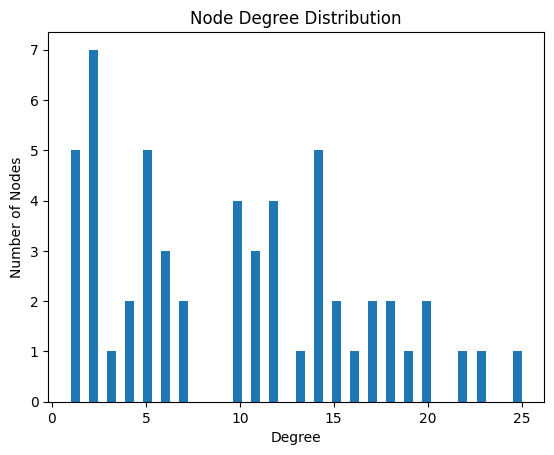

Top 5 nodes with highest degree: [('12_9', 25), ('14_3', 23), ('7_4', 22), ('1_15', 20), ('8_17', 20)]


In [77]:
G = G_env # TASK: identify most common cells
# Node degree
degree_dict = dict(G.degree())
plt.hist(degree_dict.values(), bins=50)
plt.xlabel('Degree')
plt.ylabel('Number of Nodes')
plt.title('Node Degree Distribution')
plt.show()

# Top 5 nodes with highest degree
top_5_nodes = sorted(degree_dict.items(), key=lambda x: x[1], reverse=True)[:5]
print('Top 5 nodes with highest degree:', top_5_nodes)

In [78]:
# print the source and classification of the top 5 nodes
for node, degree in top_5_nodes:
    nb_idx, mc_idx = map(int, node.split('_'))
    print(f"Nb {nb_idx}, cell {mc_idx} (node {node}) with degree {degree}:")
    print('Source:', notebooks[nb_idx]['all_cells'][mc_idx]['source'])
    print('Classification:', notebooks[nb_idx]['all_cells'][mc_idx]['classification'])
    # print the 5 most similar cells to the current node
    print('__________5 most similar cells:__________')
    top_5_similar = sorted(G[node].items(), key=lambda x: x[1]['weight'], reverse=True)[:5]
    for similar_node, edge_data in top_5_similar:
        sim_nb_idx, sim_mc_idx = map(int, similar_node.split('_'))
        print(f"\tNb {sim_nb_idx}, cell {sim_mc_idx} (node {similar_node}) with similarity {edge_data['weight']}")

        print('Source:', notebooks[sim_nb_idx]['all_cells'][sim_mc_idx]['source'])
        print('Classification:', notebooks[sim_nb_idx]['all_cells'][sim_mc_idx]['classification'])
        print('___________________________________________')
    
    
    print('\n')
    print('-------------------------------------------------------------------------')
    print('\n')

Nb 12, cell 9 (node 12_9) with degree 25:
Source: sns.countplot(x='Pclass', hue='Survived', data=train_df)
plt.show()
Classification: Environment
__________5 most similar cells:__________
	Nb 18, cell 42 (node 18_42) with similarity 0.9695392847061157
Source: sns.factorplot('Pclass','Survived',col='Initial',data=data)
plt.show()
Classification: Environment
___________________________________________
	Nb 18, cell 24 (node 18_24) with similarity 0.9596562385559082
Source: sns.factorplot('Pclass','Survived',hue='Sex',data=data)
plt.show()
Classification: Environment
___________________________________________
	Nb 1, cell 15 (node 1_15) with similarity 0.9415007829666138
Source: dfplt = df.copy(deep=True)
dfplt["Survived"] = dfplt["Survived"].astype(str)
fig = px.histogram(dfplt, x="Cabin",color="Survived", height=300,
                   color_discrete_sequence=cm)
fig.show()
Classification: Environment
___________________________________________
	Nb 8, cell 31 (node 8_31) with similarity 

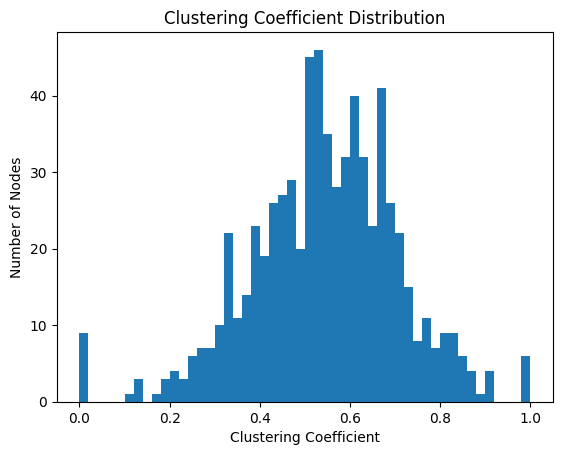

Average clustering coefficient: 0.5433250983078071


In [53]:
# TASK: Determine the overall clustering tendency in the network, 
# Clustering coefficient
clustering_coeff = nx.clustering(G)
plt.hist(clustering_coeff.values(), bins=50)
plt.xlabel('Clustering Coefficient')
plt.ylabel('Number of Nodes')
plt.title('Clustering Coefficient Distribution')
plt.show()

# Average clustering coefficient
avg_clustering = sum(clustering_coeff.values()) / len(clustering_coeff)
print('Average clustering coefficient:', avg_clustering)



Top 5 nodes by betweenness centrality: [('14_23', 0.035600159771290836), ('3_30', 0.023402846858568783), ('10_24', 0.023143272429217564), ('4_49', 0.021761060952676624), ('12_3', 0.020669605409222403)]
Top 5 nodes by closeness centrality: [('3_30', 0.5871404399323181), ('7_32', 0.5587761674718197), ('10_41', 0.552988047808765), ('3_32', 0.5499207606973059), ('7_29', 0.5499207606973059)]
Top 5 nodes by eigenvector centrality: [('10_47', 0.09770548270341564), ('3_30', 0.0967934583993885), ('2_50', 0.09532923531783465), ('9_28', 0.09463727761264917), ('15_26', 0.09388971339732634)]
Bottom 5 nodes by betweenness centrality: [('1_42', 0.0), ('8_3', 0.0), ('18_50', 0.0), ('19_23', 0.0), ('3_31', 0.0)]
Bottom 5 nodes by closeness centrality: [('0_4', 0.1855118952151831), ('0_6', 0.1855118952151831), ('16_8', 0.1855118952151831), ('3_8', 0.2273173927284638), ('7_9', 0.2273173927284638)]
Bottom 5 nodes by eigenvector centrality: [('16_8', 1.2024588781511684e-08), ('0_4', 1.5852521165427413e-08)

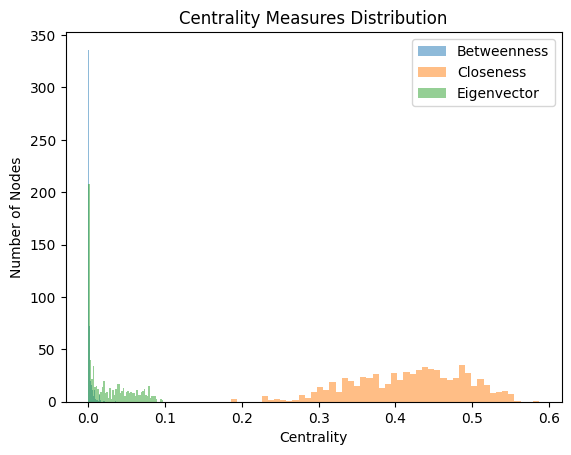

In [54]:

# TASK: Detect clusters of cells with similar functionality
# Centrality measures
betweenness_centrality = nx.betweenness_centrality(G)
closeness_centrality = nx.closeness_centrality(G)
eigenvector_centrality = nx.eigenvector_centrality(G)

# Top 5 nodes by betweenness centrality
top_5_betweenness = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)[:5]
print('Top 5 nodes by betweenness centrality:', top_5_betweenness) # SHOULD BE MOST IMPOrTANT NODES IN NETWORK? 

# Top 5 nodes by closeness centrality
top_5_closeness = sorted(closeness_centrality.items(), key=lambda x: x[1], reverse=True)[:5]
print('Top 5 nodes by closeness centrality:', top_5_closeness)

# Top 5 nodes by eigenvector centrality
top_5_eigenvector = sorted(eigenvector_centrality.items(), key=lambda x: x[1], reverse=True)[:5]
print('Top 5 nodes by eigenvector centrality:', top_5_eigenvector)

# Bottom 5 nodes by betweenness centrality
bottom_5_betweenness = sorted(betweenness_centrality.items(), key=lambda x: x[1])[:5]
print('Bottom 5 nodes by betweenness centrality:', bottom_5_betweenness)

# Bottom 5 nodes by closeness centrality
bottom_5_closeness = sorted(closeness_centrality.items(), key=lambda x: x[1])[:5]
print('Bottom 5 nodes by closeness centrality:', bottom_5_closeness)

# Bottom 5 nodes by eigenvector centrality
bottom_5_eigenvector = sorted(eigenvector_centrality.items(), key=lambda x: x[1])[:5]
print('Bottom 5 nodes by eigenvector centrality:', bottom_5_eigenvector)

# Visualization of centrality distributions
plt.hist(betweenness_centrality.values(), bins=50, alpha=0.5, label='Betweenness')
plt.hist(closeness_centrality.values(), bins=50, alpha=0.5, label='Closeness')
plt.hist(eigenvector_centrality.values(), bins=50, alpha=0.5, label='Eigenvector')
plt.xlabel('Centrality')
plt.ylabel('Number of Nodes')
plt.title('Centrality Measures Distribution')
plt.legend()
plt.show()


Number of connected components: 1


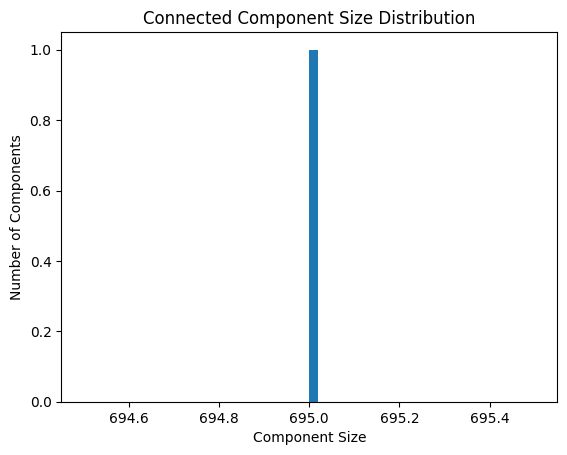

Sizes of all connected components: [695]


In [55]:
# TASK: identify isolated groups of similar cells, which could represent distinct sections or independent pieces of code
# Connected components
connected_components = list(nx.connected_components(G))
# Number of connected components
num_components = len(connected_components)
print('Number of connected components:', num_components)

component_sizes = [len(component) for component in connected_components]
plt.hist(component_sizes, bins=50)
plt.xlabel('Component Size')
plt.ylabel('Number of Components')
plt.title('Connected Component Size Distribution')
plt.show()

# the sizes of all connected components
print('Sizes of all connected components:', component_sizes)


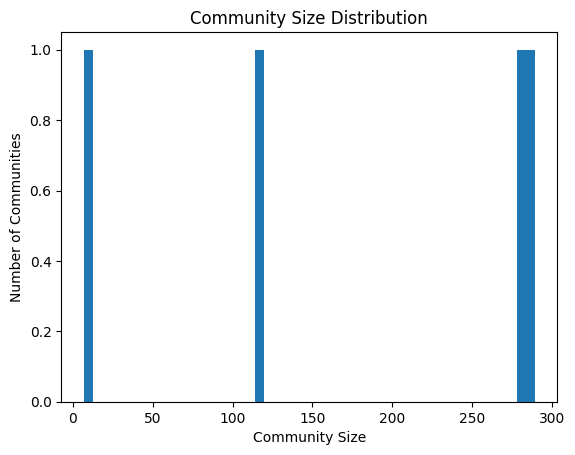

Number of communities: 4
Community 1 size: 289
Community 2 size: 281
Community 3 size: 118
Community 4 size: 7
Community 1 members: frozenset({'13_29', '11_11', '15_34', '0_32', '2_31', '1_12', '13_11', '13_44', '13_32', '6_48', '15_24', '3_40', '12_15', '19_31', '13_27', '13_42', '1_38', '4_24', '8_31', '11_36', '12_43', '14_30', '18_7', '11_27', '9_11', '10_36', '8_32', '18_45', '16_10', '9_19', '8_6', '15_21', '13_5', '13_31', '8_34', '1_44', '13_12', '12_36', '1_10', '12_21', '14_49', '8_19', '13_22', '15_8', '19_25', '19_22', '14_42', '13_13', '0_15', '13_30', '3_47', '0_39', '1_46', '6_38', '16_37', '0_40', '2_15', '2_9', '15_44', '19_8', '10_24', '9_3', '19_45', '12_39', '12_31', '18_16', '10_37', '14_21', '1_40', '2_14', '15_28', '6_26', '7_12', '6_32', '17_31', '0_21', '13_45', '12_26', '19_46', '12_27', '1_21', '8_22', '8_38', '4_8', '2_36', '8_21', '3_7', '15_50', '3_18', '8_25', '14_18', '15_26', '6_31', '12_10', '2_38', '12_14', '12_19', '3_42', '14_32', '10_28', '1_4', '1

In [56]:
# TASK: Discover groups of cells that are very very similar
# Community detection
from networkx.algorithms.community import greedy_modularity_communities
communities = greedy_modularity_communities(G)
community_sizes = [len(community) for community in communities]
plt.hist(community_sizes, bins=50)
plt.xlabel('Community Size')
plt.ylabel('Number of Communities')
plt.title('Community Size Distribution')
plt.show()

# Number of communities
num_communities = len(communities)
print('Number of communities:', num_communities)

# Example: Top 5 communities by size
top_5_communities = sorted(communities, key=len, reverse=True)[:5]
for i, community in enumerate(top_5_communities):
    print(f'Community {i+1} size: {len(community)}')

# print members of each comunnity
for i, community in enumerate(communities):
    print(f'Community {i+1} members:', community)

In [ ]:
# example
nb1, c1 = 2,3
nb2, c2 = 6,3
print(cell_sim_matrix[nb1][nb2][c1][c2])

#print the source of both cells
print('source c1: ',notebooks[nb1]['all_cells'][c1]['source'])
print('source c2: ', notebooks[nb2]['all_cells'][c2]['source'])



0.894577145576477
source c1:  import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from sklearn.metrics import confusion_matrix
import pandas as pd
import numpy as np
import math 
import xgboost as xgb
np.random.seed(2019)
from scipy.stats import skew
from scipy import stats

import statsmodels
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt
%matplotlib inline
print("done")
source c2:  import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
